<a href="https://colab.research.google.com/github/binhluong84/Machine-Learning/blob/main/Cat_vs_Dog_Image_Classification_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
image_dir = Path('/gdrive/MyDrive/Cat and Dog Image Classification (CNN)/Dog and Cat .png')

In [4]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [5]:
image_df


,Filepath,Label
0,/gdrive/MyDrive/Cat and Dog Image Classificati...,Dog
1,/gdrive/MyDrive/Cat and Dog Image Classificati...,Dog
2,/gdrive/MyDrive/Cat and Dog Image Classificati...,Dog
3,/gdrive/MyDrive/Cat and Dog Image Classificati...,Dog
4,/gdrive/MyDrive/Cat and Dog Image Classificati...,Dog
...,...,...
994,/gdrive/MyDrive/Cat and Dog Image Classificati...,Cat
995,/gdrive/MyDrive/Cat and Dog Image Classificati...,Cat
996,/gdrive/MyDrive/Cat and Dog Image Classificati...,Cat
997,/gdrive/MyDrive/Cat and Dog Image Classificati...,Cat


In [12]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [14]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 560 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.
Found 300 validated image filenames belonging to 2 classes.


In [15]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Epoch 1/100
18/18 [==============================] - 33s 2s/step - loss: 0.6949 - accuracy: 0.4786 - val_loss: 0.6920 - val_accuracy: 0.4964 - lr: 0.0010
Epoch 2/100
18/18 [==============================] - 31s 2s/step - loss: 0.6922 - accuracy: 0.5125 - val_loss: 0.6891 - val_accuracy: 0.6187 - lr: 0.0010
Epoch 3/100
18/18 [==============================] - 31s 2s/step - loss: 0.6895 - accuracy: 0.5482 - val_loss: 0.6845 - val_accuracy: 0.5971 - lr: 0.0010
Epoch 4/100
18/18 [==============================] - 31s 2s/step - loss: 0.6832 - accuracy: 0.5696 - val_loss: 0.6875 - val_accuracy: 0.4820 - lr: 0.0010
Epoch 5/100
18/18 [==============================] - 31s 2s/step - loss: 0.6801 - accuracy: 0.5607 - val_loss: 0.6894 - val_accuracy: 0.4820 - lr: 0.0010
Epoch 6/100
18/18 [==============================] - 31s 2s/step - loss: 0.6756 - accuracy: 0.5982 - val_loss: 0.6658 - val_accuracy: 0.5899 - lr: 0.0010
Epoch 7/100
18/18 [==============================] - 31s 2s/step - loss: 0.6

In [16]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.65530
Test Accuracy: 59.67%


10/10 [==============================] - 5s 488ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


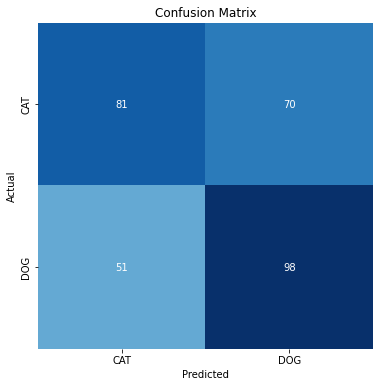

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.61      0.54      0.57       151
         DOG       0.58      0.66      0.62       149

    accuracy                           0.60       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.60      0.60      0.60       300



In [17]:
predictions = (model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)